# TASK 4.10

Goal-To provide better insight for customer profiling in terms of ads, bonus programs, and sales information.

# STEP 1

In [5]:
#Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [6]:
path=r'/Users/angitha/Achievement 4.10'

In [7]:
#Import pickle file
ords_prod = pd.read_pickle(os.path.join( path, 'Data', 'Original data', 'ords_prods_aggregated_customer_merge.pkl'))

# STEP 2

Consider any security implications that might exist for this new data. You’ll need to address any PII data in the data before continuing your analysis.


In [9]:
# Removing the limit on max columns for the head function
pd.set_option('display.max_columns', None)

In [10]:
# Viewing some rows and all columns to determine if there are any privacy issues
ords_prod.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,product_name,aisle_id,department_id,prices,_merge,price_range_loc,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_price,spending_flag,median_days,frequency_flag,first_name,surname,gender,state,age,date_joined,n_dependants,fam_status,income
0,2,33120,1,1,202279,prior,3,5,9,8.0,Organic Egg Whites,86,16,11.3,both,NaN,Mid-range product,Regularly busy,Regularly busy,Most orders,8,New customer,8.618889,Low spender,24.0,Non-frequent customer,Paul,Coleman,Male,Idaho,57,2/6/2020,3,married,98119
1,104690,33120,2,1,202279,prior,8,6,10,30.0,Organic Egg Whites,86,16,11.3,both,NaN,Mid-range product,Regularly busy,Regularly busy,Most orders,8,New customer,8.618889,Low spender,24.0,Non-frequent customer,Paul,Coleman,Male,Idaho,57,2/6/2020,3,married,98119
2,132412,33120,1,1,202279,prior,6,5,9,30.0,Organic Egg Whites,86,16,11.3,both,NaN,Mid-range product,Regularly busy,Regularly busy,Most orders,8,New customer,8.618889,Low spender,24.0,Non-frequent customer,Paul,Coleman,Male,Idaho,57,2/6/2020,3,married,98119
3,2808715,33120,1,1,202279,prior,5,5,13,9.0,Organic Egg Whites,86,16,11.3,both,NaN,Mid-range product,Regularly busy,Regularly busy,Most orders,8,New customer,8.618889,Low spender,24.0,Non-frequent customer,Paul,Coleman,Male,Idaho,57,2/6/2020,3,married,98119
4,2894949,33120,5,0,202279,prior,1,5,9,NaN,Organic Egg Whites,86,16,11.3,both,NaN,Mid-range product,Regularly busy,Regularly busy,Most orders,8,New customer,8.618889,Low spender,24.0,Non-frequent customer,Paul,Coleman,Male,Idaho,57,2/6/2020,3,married,98119


INSIGHT

There is no PII included in the dataframe. It was excluded from final set. Gender, together with age and state would not be enough to identify any individual. 

# STEP 3

The Instacart officers are interested in comparing customer behavior in different geographic areas. Create a regional segmentation of the data.

In [11]:
# Creating a mapping dictionary for US regions
region_map = {
    'Maine':'Northeast',
    'New Hampshire':'Northeast',
    'Vermont':'Northeast',
    'Massachusetts':'Northeast',
    'Rhose Island':'Northeast',
    'Connecticut':'Northeast',
    'New York':'Northeast',
    'Pennsylvania':'Northeast',
    'New Jersey':'Northeast',
    'Wisconsin':'Midwest',
    'Michigan':'Midwest',
    'Illinois':'Midwest',
    'Indiana':'Midwest',
    'Ohio':'Midwest',
    'North Dakota':'Midwest',
    'South Dakota':'Midwest',
    'Nebraska':'Midwest',
    'Kansas':'Midwest',
    'Minnesota':'Midwest',
    'Iowa':'Midwest',
    'Missouri':'Midwest',
    'Delaware':'South',
    'Maryland':'South',
    'District of Columbia':'South',
    'Virginia':'South',
    'West Virginia':'South',
    'North Carolina':'South',
    'South Carolina':'South',
    'Georgia':'South',
    'Florida':'South',
    'Kentucky':'South',
    'Tennessee':'South',
    'Mississippi':'South',
    'Alabama':'South',
    'Oklahoma':'South',
    'Texas':'South',
    'Arkansas':'South',
    'Louisiana':'South',
    'Idaho':'West',
    'Montana':'West',
    'Wyoming':'West',
    'Nevada':'West',
    'Utah':'West',
    'Colorado':'West',
    'Arizona':'West',
    'New Mexico':'West',
    'Alaska':'West',
    'Washington':'West',
    'Oregon':'West',
    'California':'West',
    'Hawaii':'West'
}

In [12]:
# Creating region category and assigning its value based on state for that row
ords_prod['region'] = ords_prod['state'].map(region_map)

In [13]:
# Performing a count to verify that the category is there and that regions are assigned
ords_prod['region'].value_counts()

South        10801610
West          8300445
Midwest       7603810
Northeast     5070692
Name: region, dtype: int64

In [14]:
# Creating a crosstab to compare regions with spending_flag
cross_ords_prod = pd.crosstab(ords_prod['region'],ords_prod['spending_flag'], dropna=False)

In [15]:
# Copying to clip board to past into Excel
cross_ords_prod.to_clipboard()

In [ ]:
# Output from Excel - this actually is formatted rather well within for Python too
# DO NOT RUN THIS
region	High spender	Low spender
Midwest	156154	7441171
Northeast	93435	4972388
South	210017	10581868
West	160478	8132435

Insight:

There does not appear to be a difference in spending habits between the four regions of the US. By calculating the percentage of the high and low spending population, the results were very close.

The high spender population for all four regions ranged between 2.0-1.8% while the low spender population for all four regions ranged between 97.9-98.1%.


# STEP 4

The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample.

In [17]:
# Getting a count of the main dataframe, since the export will be cutting this number
ords_prod.shape

(32434212, 36)

In [18]:
# Grouping by user id to associate order numbers to them
ords_prod.groupby('user_id')

In [19]:
# Creating new cust_activity column and flagging low activity users
ords_prod.loc[ords_prod['max_order']<5, 'cust_activity'] = 'Low activity'

In [20]:
# Doing the same for high activity users
ords_prod.loc[ords_prod['max_order']>=5, 'cust_activity'] = 'High activity'

In [21]:
# Getting the counts of High and Low activity labels
ords_prod['cust_activity'].value_counts()

High activity    30992664
Low activity      1441548
Name: cust_activity, dtype: int64

INSIGHT

Here each row is basically a purchase by that user. i.e. there isn't 30 million "high activity" users, there are 30 million rows labelled with "high activity". Just to make sure the users are labelled correctly. To do this,a subset is created where the user_id is grouped with their order number and a count of items in that order can be retrieved.


In [22]:
# Creating subset of data and grouping by user_id, order_number, and cust_activity
activity_counts = ords_prod.groupby(['user_id', 'order_number', 'cust_activity'])['cust_activity'].count()

In [23]:
# Resetting index and making the subset a dataframe
activity_counts = activity_counts.reset_index(name='count')

In [24]:
# Quick numbers verification
print(activity_counts)

         user_id  order_number  cust_activity  count
0              1             1  High activity      5
1              1             2  High activity      6
2              1             3  High activity      5
3              1             4  High activity      5
4              1             5  High activity      8
...          ...           ...            ...    ...
3214856   206209             9  High activity      3
3214857   206209            10  High activity      9
3214858   206209            11  High activity      8
3214859   206209            12  High activity     20
3214860   206209            13  High activity      9

[3214861 rows x 4 columns]


In [25]:
# This worked out well, enter a user ID to see their total orders and how many items were in that order
activity_counts[activity_counts['user_id'] ==5]

,user_id,order_number,cust_activity,count
41,5,1,Low activity,11
42,5,2,Low activity,9
43,5,3,Low activity,5
44,5,4,Low activity,12


In [26]:
# Creating a new subset with the low activity rows dropped
high_act_ords_prod = ords_prod.loc[ords_prod['cust_activity'] == 'High activity']

In [27]:
high_act_ords_prod.head(3)

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,product_name,aisle_id,department_id,prices,_merge,price_range_loc,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_price,spending_flag,median_days,frequency_flag,first_name,surname,gender,state,age,date_joined,n_dependants,fam_status,income,region,cust_activity
0,2,33120,1,1,202279,prior,3,5,9,8.0,Organic Egg Whites,86,16,11.3,both,NaN,Mid-range product,Regularly busy,Regularly busy,Most orders,8,New customer,8.618889,Low spender,24.0,Non-frequent customer,Paul,Coleman,Male,Idaho,57,2/6/2020,3,married,98119,West,High activity
1,104690,33120,2,1,202279,prior,8,6,10,30.0,Organic Egg Whites,86,16,11.3,both,NaN,Mid-range product,Regularly busy,Regularly busy,Most orders,8,New customer,8.618889,Low spender,24.0,Non-frequent customer,Paul,Coleman,Male,Idaho,57,2/6/2020,3,married,98119,West,High activity
2,132412,33120,1,1,202279,prior,6,5,9,30.0,Organic Egg Whites,86,16,11.3,both,NaN,Mid-range product,Regularly busy,Regularly busy,Most orders,8,New customer,8.618889,Low spender,24.0,Non-frequent customer,Paul,Coleman,Male,Idaho,57,2/6/2020,3,married,98119,West,High activity


In [28]:
# Verifying only High activity users made it, and number matches opm's value_counts
high_act_ords_prod['cust_activity'].value_counts()

High activity    30992664
Name: cust_activity, dtype: int64

In [29]:
# Exporting this for CFO, using .csv file instead of pickle for exec
high_act_ords_prod.to_csv(os.path.join(path, 'Sent to Client', 'high_account_activity.csv'))
high_act_ords_prod.to_pickle(os.path.join(path, 'Data', 'Prepared Data', 'high_account_activity.pkl'))

# STEP 5

The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are, thus, curious about customer profiling in their database. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents.

# Creating a label with age

In [30]:
# For age, separating them into categories may be useful, first to get some data
age_ords_prod = ords_prod['age'].describe()

In [31]:
print(age_ords_prod)

count    3.243421e+07
mean     4.946521e+01
std      1.848553e+01
min      1.800000e+01
25%      3.300000e+01
50%      4.900000e+01
75%      6.500000e+01
max      8.100000e+01
Name: age, dtype: float64


INSIGHT

The minimum age is 18, and a max is 81. The average is around 49 years of age. Outliers is above 65 years and below 33 years.

It can start with age group of 18-34, so age of X5 can be chosen for each group ending at 65+ years, so that both the lower and higher outliers are within a single grouping each.


In [32]:
# Creating age_group column in opm dataframe, assigning 
ords_prod.loc[ords_prod['age'] <= 34, 'age_group'] = '18-34ys'

In [33]:
ords_prod.loc[(ords_prod['age'] >= 35) & (ords_prod['age']<= 44), 'age_group'] = '35-44yrs'

In [34]:
ords_prod.loc[(ords_prod['age'] >= 45) & (ords_prod['age']<=54), 'age_group'] = '45-54yrs'

In [35]:
ords_prod.loc[(ords_prod['age']>=55) & (ords_prod['age']<=64), 'age_group'] = '55-64yrs'

In [36]:
ords_prod.loc[ords_prod['age']>=65, 'age_group'] = '65yrs and above'

In [37]:
# Checking the counts, it may be possible to divide 18-34 further, in the future - as the population is relatively large
ords_prod['age_group'].value_counts()

18-34ys            8635497
65yrs and above    8582637
45-54yrs           5115832
35-44yrs           5066799
55-64yrs           5033447
Name: age_group, dtype: int64

# Creating a label using income:

In [38]:
income_ords_prod = ords_prod['income'].describe()

In [39]:
print(income_ords_prod)

count    3.243421e+07
mean     9.943525e+04
std      4.305473e+04
min      2.590300e+04
25%      6.699800e+04
50%      9.661200e+04
75%      1.279080e+05
max      5.939010e+05
Name: income, dtype: float64


INSIGHT

The average for income is around 99,437. The min is about 25,903 and the max is about 593,901.  The lower quartile can be used to mark the "Low income" users and the upper quartile for the "High income" users. The "Regular income" users can be everything in between:

Low income = 67,004 and lower

Regular income = 67,005 - 127,911

High income = 127,912 and higher


In [41]:
# Defining income categories
low_income_threshold = 67004
high_income_threshold = 127912

In [42]:
# Setting the threshold of each income tier using if then logic
def categorize_income(income):
    if income<=low_income_threshold:
        return 'Low income'
    elif low_income_threshold < income <= high_income_threshold:
        return 'Regular income'
    else:
        return "High income"

In [43]:
ords_prod['income_status'] = ords_prod['income'].apply(categorize_income)

In [44]:
ords_prod.head(3)

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,product_name,aisle_id,department_id,prices,_merge,price_range_loc,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_price,spending_flag,median_days,frequency_flag,first_name,surname,gender,state,age,date_joined,n_dependants,fam_status,income,region,cust_activity,age_group,income_status
0,2,33120,1,1,202279,prior,3,5,9,8.0,Organic Egg Whites,86,16,11.3,both,NaN,Mid-range product,Regularly busy,Regularly busy,Most orders,8,New customer,8.618889,Low spender,24.0,Non-frequent customer,Paul,Coleman,Male,Idaho,57,2/6/2020,3,married,98119,West,High activity,55-64yrs,Regular income
1,104690,33120,2,1,202279,prior,8,6,10,30.0,Organic Egg Whites,86,16,11.3,both,NaN,Mid-range product,Regularly busy,Regularly busy,Most orders,8,New customer,8.618889,Low spender,24.0,Non-frequent customer,Paul,Coleman,Male,Idaho,57,2/6/2020,3,married,98119,West,High activity,55-64yrs,Regular income
2,132412,33120,1,1,202279,prior,6,5,9,30.0,Organic Egg Whites,86,16,11.3,both,NaN,Mid-range product,Regularly busy,Regularly busy,Most orders,8,New customer,8.618889,Low spender,24.0,Non-frequent customer,Paul,Coleman,Male,Idaho,57,2/6/2020,3,married,98119,West,High activity,55-64yrs,Regular income


In [46]:
# Grabbing a count of the values, makes sense cause low and high take up 25% of the dataset and regular is 50%
ords_prod['income_status'].value_counts()

Regular income    16216709
Low income         8109439
High income        8108064
Name: income_status, dtype: int64

# Creating label based on department_id:

In [47]:
# Looking at the departments_wrangled.csv file, I noticed depart 21 is missing
# Going to try to find what it could be
ords_prod.loc[ords_prod['department_id']==21]

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,product_name,aisle_id,department_id,prices,_merge,price_range_loc,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_price,spending_flag,median_days,frequency_flag,first_name,surname,gender,state,age,date_joined,n_dependants,fam_status,income,region,cust_activity,age_group,income_status
483,3172877,48865,18,0,153404,prior,31,0,18,27.0,Organic Ground Chicken,100,21,8.0,both,NaN,Mid-range product,Busiest day,Busiest days,Average orders,32,Regular customer,8.072613,Low spender,8.0,Frequent customer,Kathleen,Norton,Female,Virginia,62,8/15/2018,0,divorced/widowed,136045,South,High activity,55-64yrs,High income
557,3309276,7654,6,0,23750,prior,12,3,17,18.0,Assorted Fruit Flavor Gumdrops,100,21,13.0,both,NaN,Mid-range product,Regularly busy,Least busy days,Average orders,13,Regular customer,8.598592,Low spender,10.0,Frequent customer,Clarence,Ball,Male,Michigan,66,10/30/2019,0,divorced/widowed,93806,Midwest,High activity,65yrs and above,Regular income
2229,3129683,11286,23,0,166654,prior,60,6,9,12.0,Organic Uncured Beef Hot Dog,100,21,9.4,both,NaN,Mid-range product,Regularly busy,Regularly busy,Most orders,62,Loyal customer,7.302487,Low spender,5.0,Frequent customer,James,Hunter,Male,Mississippi,60,4/19/2019,3,married,115135,South,High activity,55-64yrs,Regular income
4058,643972,41149,9,1,91030,prior,32,0,14,8.0,Organic Riced Cauliflower,100,21,13.8,both,NaN,Mid-range product,Busiest day,Busiest days,Most orders,38,Regular customer,7.939150,Low spender,8.0,Frequent customer,Teresa,Woods,Female,Vermont,55,1/16/2017,0,single,110448,Northeast,High activity,55-64yrs,Regular income
4059,1937933,41149,12,0,91030,prior,30,0,12,3.0,Organic Riced Cauliflower,100,21,13.8,both,NaN,Mid-range product,Busiest day,Busiest days,Most orders,38,Regular customer,7.939150,Low spender,8.0,Frequent customer,Teresa,Woods,Female,Vermont,55,1/16/2017,0,single,110448,Northeast,High activity,55-64yrs,Regular income
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32431813,1701682,34779,4,0,35805,prior,2,5,12,13.0,Greek Low Fat Strained Honey Blended Yogurt Wi...,100,21,6.4,both,NaN,Mid-range product,Regularly busy,Regularly busy,Most orders,3,New customer,5.837500,Low spender,13.0,Regular customer,Patrick,Fowler,Male,Arizona,18,3/20/2017,1,living with parents and siblings,40005,West,Low activity,18-34ys,Low income
32431814,2445912,34779,1,1,35805,prior,3,4,17,6.0,Greek Low Fat Strained Honey Blended Yogurt Wi...,100,21,6.4,both,NaN,Mid-range product,Least busy,Least busy days,Average orders,3,New customer,5.837500,Low spender,13.0,Regular customer,Patrick,Fowler,Male,Arizona,18,3/20/2017,1,living with parents and siblings,40005,West,Low activity,18-34ys,Low income
32432909,1556835,10043,2,0,128522,prior,3,5,17,30.0,Lightly Sweet Chai Skinny Latte,100,21,2.8,both,NaN,Low-range product,Regularly busy,Regularly busy,Average orders,4,New customer,5.022222,Low spender,30.0,Non-frequent customer,Margaret,Hale,Female,Alaska,56,2/4/2020,2,married,46467,West,Low activity,55-64yrs,Low income
32433610,989030,4073,1,0,93137,prior,3,5,10,30.0,Limited Edition Pumpkin Spice Instant Oatmeal,100,21,6.1,both,NaN,Mid-range product,Regularly busy,Regularly busy,Most orders,3,New customer,8.400000,Low spender,30.0,Non-frequent customer,Debra,Marks,Female,Georgia,65,5/3/2018,1,married,162219,South,Low activity,65yrs and above,High income


INSIGHT

Not really sure what the department is. There's office supplies, dairy, fresh vegetables, health and beauty items, etc. Prices range anywhere from 1.10 to 14.80. The only thing consistent is that all the products are in isle 100. However, prices do not indicate clearance or sale items nor is there a seasonal theme to the products.Labelling the department as Misc in the csv file.


In [48]:
# Loading departments csv file
deptdf = pd.read_csv(os.path.join(path,'Data', 'Original data', 'departments_wrangled.csv'))

In [49]:
# Checking to make sure its loaded
deptdf

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [50]:
# Renaming Unnamed: 0 to department_id
deptdf = deptdf.rename(columns = {'Unnamed: 0':'department_id'})

In [51]:
# Creating a new dataframe for merged content
ords_prod_merged = ords_prod.merge(deptdf, on = 'department_id')

In [52]:
# Checking that everything looks alright
ords_prod_merged.head(3)

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,product_name,aisle_id,department_id,prices,_merge,price_range_loc,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_price,spending_flag,median_days,frequency_flag,first_name,surname,gender,state,age,date_joined,n_dependants,fam_status,income,region,cust_activity,age_group,income_status,department
0,2,33120,1,1,202279,prior,3,5,9,8.0,Organic Egg Whites,86,16,11.3,both,NaN,Mid-range product,Regularly busy,Regularly busy,Most orders,8,New customer,8.618889,Low spender,24.0,Non-frequent customer,Paul,Coleman,Male,Idaho,57,2/6/2020,3,married,98119,West,High activity,55-64yrs,Regular income,dairy eggs
1,104690,33120,2,1,202279,prior,8,6,10,30.0,Organic Egg Whites,86,16,11.3,both,NaN,Mid-range product,Regularly busy,Regularly busy,Most orders,8,New customer,8.618889,Low spender,24.0,Non-frequent customer,Paul,Coleman,Male,Idaho,57,2/6/2020,3,married,98119,West,High activity,55-64yrs,Regular income,dairy eggs
2,132412,33120,1,1,202279,prior,6,5,9,30.0,Organic Egg Whites,86,16,11.3,both,NaN,Mid-range product,Regularly busy,Regularly busy,Most orders,8,New customer,8.618889,Low spender,24.0,Non-frequent customer,Paul,Coleman,Male,Idaho,57,2/6/2020,3,married,98119,West,High activity,55-64yrs,Regular income,dairy eggs


In [53]:
ords_prod_merged['department'].value_counts()

produce            9479291
dairy eggs         5414016
snacks             2887550
beverages          2688159
frozen             2236432
pantry             1875577
bakery             1176787
canned goods       1068058
deli               1051249
dry goods pasta     866627
household           738666
breakfast           710647
meat seafood        708931
personal care       447691
babies              423802
international       269253
alcohol             153743
pets                 97724
missing              69145
other                36291
bulk                 34573
Name: department, dtype: int64

# Creating label based on number of dependants:¶

In [55]:
# Checking to see how many dependants the dataset is working with
ords_prod_merged['n_dependants'].value_counts()

3    8142318
0    8105197
2    8098387
1    8088310
Name: n_dependants, dtype: int64

INSIGHT

Looking at this, the first thing that is noticeable is that there is a vast change in life style from having no children, to having even one. Due to this, "No children" is a clear categorization.

First time parents can have very different day to day experiences compared to those with 2 or 3 children, due to that initial learning curve of parenting. Due to this spending and shopping habits for parents with 2 to 3 children are much more similar than those with only 1. Categorising "Small family" for 1 children households and "Large family" for households with 2 - 3 children.


In [58]:
# Locating entry for num_dependants and assigning a value based on that to the new column family_size
ords_prod_merged.loc[ords_prod_merged['n_dependants'] < 1, 'family_size'] = 'No children'

In [60]:
ords_prod_merged.loc[(ords_prod_merged['n_dependants']>0) & (ords_prod_merged['n_dependants']<2), 'family_size'] = 'Small family'

In [61]:
ords_prod_merged.loc[ords_prod_merged['n_dependants']>=2, 'family_size'] = 'Large family'

In [62]:
# Checking to make sure everything is still there and numbers match
ords_prod_merged.head(1)

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,product_name,aisle_id,department_id,prices,_merge,price_range_loc,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_price,spending_flag,median_days,frequency_flag,first_name,surname,gender,state,age,date_joined,n_dependants,fam_status,income,region,cust_activity,age_group,income_status,department,family_size
0,2,33120,1,1,202279,prior,3,5,9,8.0,Organic Egg Whites,86,16,11.3,both,NaN,Mid-range product,Regularly busy,Regularly busy,Most orders,8,New customer,8.618889,Low spender,24.0,Non-frequent customer,Paul,Coleman,Male,Idaho,57,2/6/2020,3,married,98119,West,High activity,55-64yrs,Regular income,dairy eggs,Large family


In [63]:
ords_prod_merged['family_size'].value_counts()

Large family    16240705
No children      8105197
Small family     8088310
Name: family_size, dtype: int64

In [64]:
ords_prod_merged.to_pickle(os.path.join(path,'Data', 'Prepared Data', 'finaldataset.pkl'))

# STEP 6

Create an appropriate visualization to show the distribution of profiles.

# Visualization for age_group label

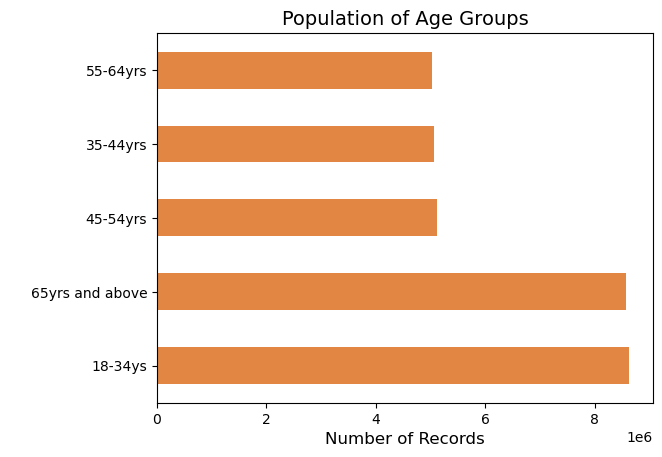

In [66]:
# Bar graph for age groups - using horizontal bar graph for ease of reading, removed y axis label due to redundancy
bar_age_group = ords_prod_merged['age_group'].value_counts()
bar_age_group = bar_age_group.plot(kind='barh', color='#e28743')
plt.xlabel("Number of Records", fontsize=12)
plt.ylabel(" ", fontsize=12)  
plt.title("Population of Age Groups", fontsize=14)
plt.show()

# Visualization for income_status label

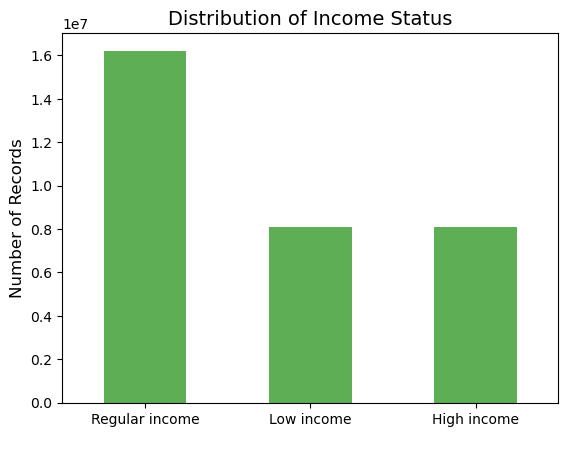

In [67]:
# Bar graph for income status - removed x axis label due to redundancy
bar_income_stat = ords_prod_merged['income_status'].value_counts()
bar_income_stat = bar_income_stat.plot(kind='bar', color='#5eae55')
plt.xlabel(" ", fontsize=12)
plt.xticks(rotation=0)
plt.ylabel("Number of Records", fontsize=12)  
plt.title("Distribution of Income Status", fontsize=14)
plt.show()

# Visualization for departments

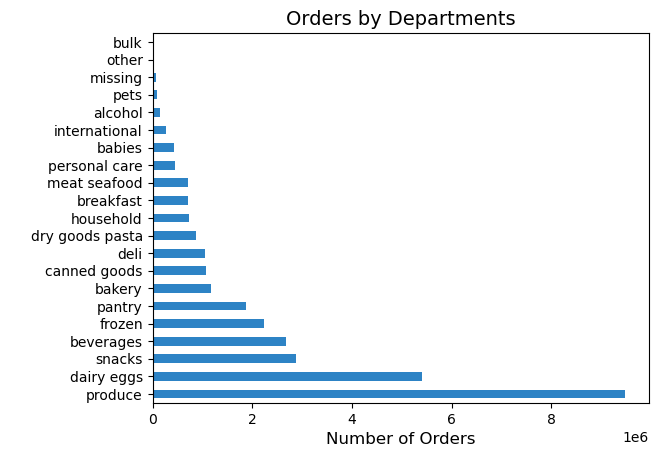

In [69]:
# bar chart listing out depts and their number of orders
bar_dept = ords_prod_merged['department'].value_counts()
bar_dept = bar_dept.plot(kind='barh', color='#2d83c5')
plt.xlabel("Number of Orders", fontsize=12)
plt.ylabel(" ", fontsize=12)  
plt.title("Orders by Departments", fontsize=14)
plt.show()

# Visualization for family_size

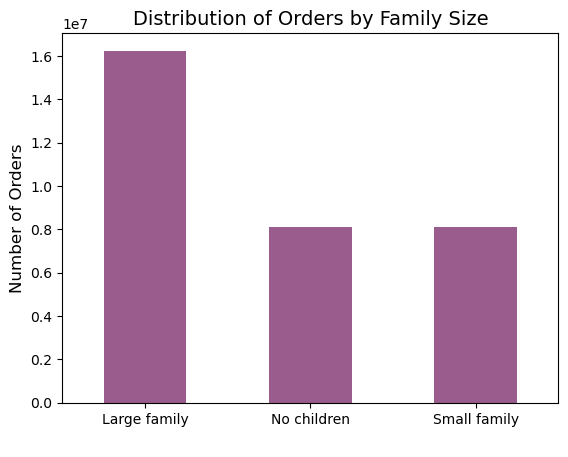

In [70]:
# Bar graph for family_size removed x axis label due to redundancy
bar_family_size = ords_prod_merged['family_size'].value_counts()
bar_family_size = bar_family_size.plot(kind='bar', color='#9a5c8c')
plt.xlabel(" ", fontsize=12)
plt.xticks(rotation=0)
plt.ylabel("Number of Orders", fontsize=12)  
plt.title("Distribution of Orders by Family Size", fontsize=14)
plt.show()

# Looking for possible line chart ideas

In [71]:
# Creating a sample population, to test a few line graphs
np.random.seed(26)
pool = np.random.rand(len(ords_prod_merged))<=0.7

In [72]:
# Dividing the content into big and small pools
big = ords_prod_merged[pool]
small = ords_prod_merged[~pool]

In [73]:
# Quick checks to make sure everything is good
len(ords_prod_merged)

32434212

In [74]:
len(small)

9729508

In [75]:
len(small)/len(ords_prod_merged)

0.29997670361160617

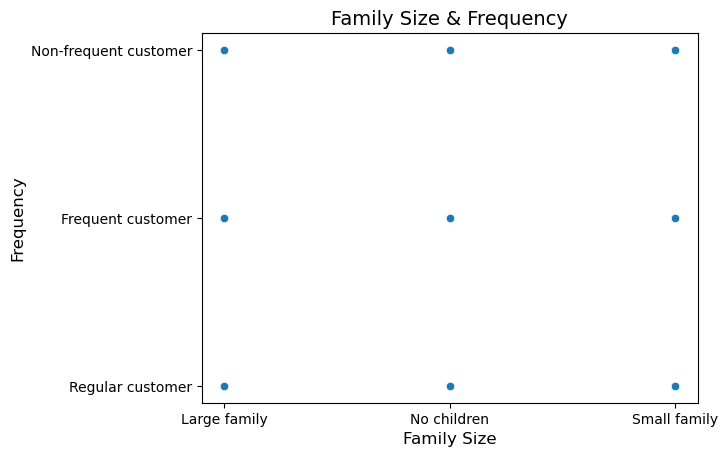

In [76]:
# Attempt at finding correlation between family size and how often they use the app
line_family_freq = sns.scatterplot(data = small, x = 'family_size', y = 'frequency_flag')
plt.xlabel("Family Size", fontsize=12)
plt.ylabel("Frequency", fontsize=12)  
plt.title("Family Size & Frequency", fontsize=14)
plt.show()

It shows that there is an existing record for each of these criterias. 

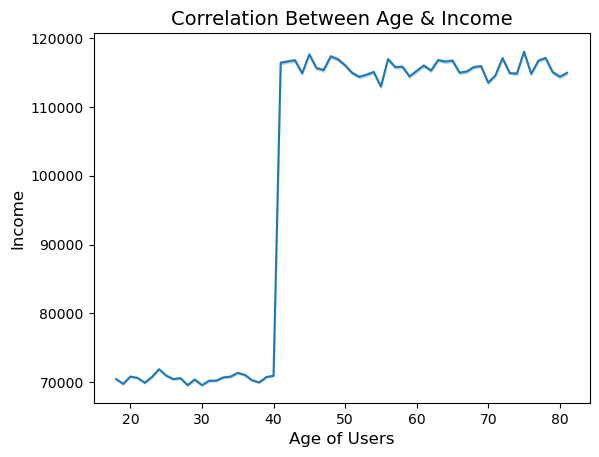

In [77]:
# Attempt to find a correlation between age and income
line_age_income = sns.lineplot(data = small, x = 'age', y = 'income')
plt.xlabel("Age of Users", fontsize=12)
plt.ylabel("Income", fontsize=12)  
plt.title("Correlation Between Age & Income", fontsize=14)
plt.show()

This one shows a big jump for the level of income, once the users on the app hit the age of 40. This could be a potential market for advertising deals, due to them having expendable income and possibly being more inclined to use that with time limited purchases or discounts.

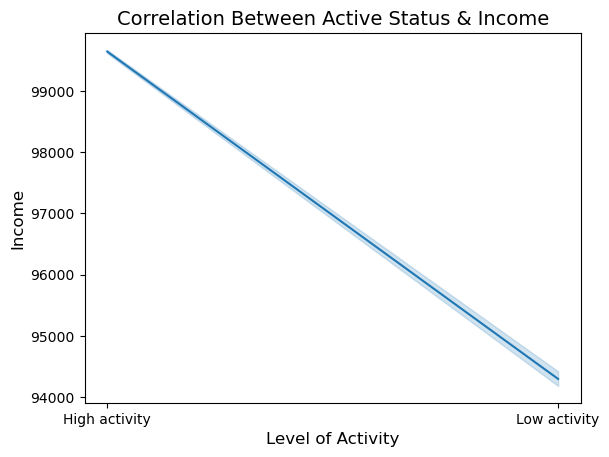

In [78]:
# Attempt at seeing if there is a correlation between how active a user is based on their income
line_actstatus_income = sns.lineplot(data = small, x = 'cust_activity', y = 'income')
plt.xlabel("Level of Activity", fontsize=12)
plt.ylabel("Income", fontsize=12)  
plt.title("Correlation Between Active Status & Income", fontsize=14)
plt.show()

It appears that there is a correlation between income and activity on the app. In this case, the more income a user has, the more they will use the app and vice versa. 

# STEP 7

Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.


In [80]:
# Needed a reference of the main data frame
ords_prod_merged.head(1)

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,product_name,aisle_id,department_id,prices,_merge,price_range_loc,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_price,spending_flag,median_days,frequency_flag,first_name,surname,gender,state,age,date_joined,n_dependants,fam_status,income,region,cust_activity,age_group,income_status,department,family_size
0,2,33120,1,1,202279,prior,3,5,9,8.0,Organic Egg Whites,86,16,11.3,both,NaN,Mid-range product,Regularly busy,Regularly busy,Most orders,8,New customer,8.618889,Low spender,24.0,Non-frequent customer,Paul,Coleman,Male,Idaho,57,2/6/2020,3,married,98119,West,High activity,55-64yrs,Regular income,dairy eggs,Large family


In [82]:
# Comparing aggregates by age_group
ords_prod_merged.groupby('age_group').agg({'order_number':['mean', 'min', 'max'], 'mean_price':['mean', 'min', 'max']})

order_number         mean_price                   
                        mean min max       mean  min           max
age_group                                                         
18-34ys            17.121585   1  99  12.174716  1.0  12506.925000
35-44yrs           17.193431   1  99  11.557816  1.0  25005.425000
45-54yrs           17.174608   1  99  12.064099  1.0  15006.940000
55-64yrs           17.167925   1  99  12.350855  1.1   8703.400000
65yrs and above    17.097254   1  99  11.770022  1.0  14042.512281

In [83]:
# Comparing aggregates by spending_flag
ords_prod_merged.groupby('spending_flag').agg({'order_number':['mean', 'min', 'max'], 'mean_price':['mean', 'min', 'max']})

order_number          mean_price                    
                      mean min max        mean   min           max
spending_flag                                                     
High spender     17.934492   1  99  221.939213  10.0  25005.425000
Low spender      17.126086   1  99    7.785376   1.0      9.998305

In [84]:
# Comparing aggregates by gender
ords_prod_merged.groupby('gender').agg({'order_number':['mean', 'min', 'max'], 'mean_price':['mean', 'min', 'max']})

order_number         mean_price                
               mean min max       mean  min        max
gender                                                
Female    17.213227   1  99  11.893068  1.0  25005.425
Male      17.071605   1  99  12.068006  1.0  15006.940

In [85]:
# Comparing aggregates by loyalty_flag
ords_prod_merged.groupby('loyalty_flag').agg({'order_number':['mean', 'min', 'max'], 'mean_price':['mean', 'min', 'max']})

order_number         mean_price                        
                         mean min max       mean       min           max
loyalty_flag                                                            
Loyal customer      32.639724   1  99  10.388747  2.387671   8794.882427
New customer         3.806988   1  10  13.294370  1.000000  25005.425000
Regular customer    12.347100   1  40  12.496203  1.308333   4506.269204

In [87]:
# Comparing aggregates by marital_status
ords_prod_merged.groupby('fam_status').agg({'order_number':['mean', 'min', 'max'], 'mean_price':['mean', 'min', 'max']})

order_number         mean_price       \
                                         mean min max       mean  min   
fam_status                                                              
divorced/widowed                    17.275139   1  99  11.455219  1.2   
living with parents and siblings    17.296642   1  99  10.831020  1.3   
married                             17.087700   1  99  12.006531  1.0   
single                              17.259236   1  99  12.481261  1.0   

                                                
                                           max  
fam_status                                      
divorced/widowed                  14042.512281  
living with parents and siblings  10209.987755  
married                           12506.925000  
single                            25005.425000

In [89]:
# Comparing aggregates by family_size
ords_prod_merged.groupby('family_size').agg({'order_number':['mean', 'min', 'max'], 'mean_price':['mean', 'min', 'max']})

order_number         mean_price                
                     mean min max       mean  min        max
family_size                                                 
Large family    17.102735   1  99  12.081447  1.0  11772.100
No children     17.264680   1  99  12.130045  1.0  25005.425
Small family    17.097604   1  99  11.630532  1.1  12506.925

In [90]:
# Comparing aggregates by income_status
ords_prod_merged.groupby('income_status').agg({'order_number':['mean', 'min', 'max'], 'mean_price':['mean', 'min', 'max']})

order_number         mean_price                        
                       mean min max       mean       min           max
income_status                                                         
High income       17.300221   1  99  22.036598  7.000000  25005.425000
Low income        16.644724   1  99   7.296626  1.000000     21.272202
Regular income    17.311414   1  99   9.296170  6.999655  12506.925000

In [91]:
# Comparing aggregates by region
ords_prod_merged.groupby('region').agg({'order_number':['mean', 'min', 'max'], 'mean_price':['mean', 'min', 'max']})

order_number         mean_price                   
                  mean min max       mean  min           max
region                                                      
Midwest      16.924751   1  99  12.715745  1.0  25005.425000
Northeast    17.194493   1  99  11.294341  1.1   5271.136842
South        17.150109   1  99  12.196270  1.0  15006.940000
West         17.279309   1  99  11.321374  1.0  10209.987755

INSIGHT

Unfortunately a lot of the outcomes are quite similar. However, if able to group all user_id's accordingly and then take that result and group by order_id, the prices would then be of a higher average, as average of the items in a particular order. Using the price column would get an average count of each specific item, which is probably not ideal.


# STEP 8

Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.

In [92]:
# Getting reference of columns and values again
ords_prod_merged.head(3)

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,product_name,aisle_id,department_id,prices,_merge,price_range_loc,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_price,spending_flag,median_days,frequency_flag,first_name,surname,gender,state,age,date_joined,n_dependants,fam_status,income,region,cust_activity,age_group,income_status,department,family_size
0,2,33120,1,1,202279,prior,3,5,9,8.0,Organic Egg Whites,86,16,11.3,both,NaN,Mid-range product,Regularly busy,Regularly busy,Most orders,8,New customer,8.618889,Low spender,24.0,Non-frequent customer,Paul,Coleman,Male,Idaho,57,2/6/2020,3,married,98119,West,High activity,55-64yrs,Regular income,dairy eggs,Large family
1,104690,33120,2,1,202279,prior,8,6,10,30.0,Organic Egg Whites,86,16,11.3,both,NaN,Mid-range product,Regularly busy,Regularly busy,Most orders,8,New customer,8.618889,Low spender,24.0,Non-frequent customer,Paul,Coleman,Male,Idaho,57,2/6/2020,3,married,98119,West,High activity,55-64yrs,Regular income,dairy eggs,Large family
2,132412,33120,1,1,202279,prior,6,5,9,30.0,Organic Egg Whites,86,16,11.3,both,NaN,Mid-range product,Regularly busy,Regularly busy,Most orders,8,New customer,8.618889,Low spender,24.0,Non-frequent customer,Paul,Coleman,Male,Idaho,57,2/6/2020,3,married,98119,West,High activity,55-64yrs,Regular income,dairy eggs,Large family


# Comparing Income Status and Region

In [94]:
# Creating a crosstab of income to region
# Had to reverse it, region to income, otherwise it just listed every possible income and showed ever possible instance of a matching record
# Third try's a charm, using income_status not actual income amount
crosstab_income_region = pd.crosstab(ords_prod_merged['region'], ords_prod_merged['income_status'], dropna=False)

In [95]:
crosstab_income_region

income_status,High income,Low income,Regular income
region,,,
Midwest,1929646,1878145,3796019
Northeast,1278647,1270425,2521620
South,2668442,2718971,5414197
West,2067634,2081455,4151356


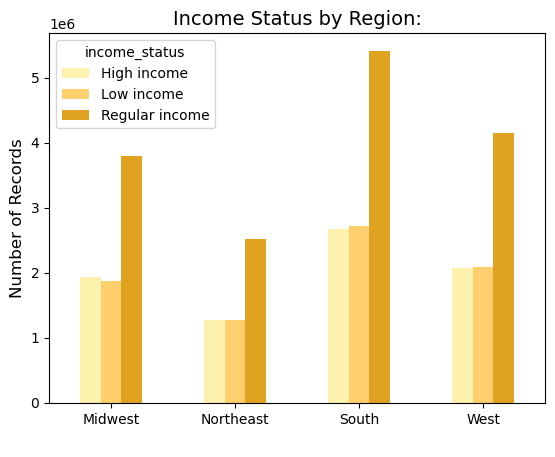

In [96]:
# Creating visualization for the crosstab
crossbar_income_region = crosstab_income_region.plot.bar(color=['#FDF2AD','#FFCF6D','#E0A221'])
plt.xlabel(" ", fontsize=12)
plt.xticks(rotation=0)
plt.ylabel("Number of Records", fontsize=12)  
plt.title("Income Status by Region:", fontsize=14)
plt.show()

# Comparing Income & Departments

In [97]:
# Now doing the same but for departments
crosstab_income_dept = pd.crosstab(ords_prod_merged['department'], ords_prod_merged['income_status'], dropna=False)

In [98]:
crosstab_income_dept

income_status,High income,Low income,Regular income
department,,,
alcohol,43016,39752,70975
babies,109102,86454,228246
bakery,304078,279288,593421
beverages,646061,776593,1265505
breakfast,172448,198579,339620
bulk,7803,9688,17082
canned goods,280071,235704,552283
dairy eggs,1374947,1283579,2755490
deli,262958,259807,528484


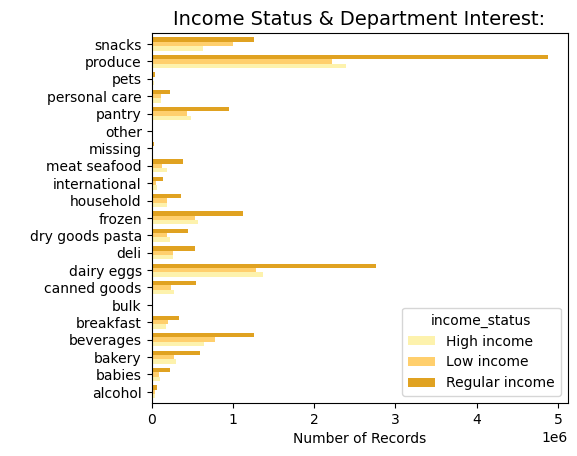

In [99]:
# Creating visualization for the crosstab
bar_width = .75
crossbar_income_dept = crosstab_income_dept.plot.barh(color=['#FDF2AD','#FFCF6D','#E0A221'], width=bar_width)
plt.xlabel("Number of Records", fontsize=10)
plt.xticks(rotation=0)
plt.ylabel(" ", fontsize=10)  
plt.title("Income Status & Department Interest:", fontsize=14)
plt.gcf().subplots_adjust(left=0.25)
plt.show()

# Comparing Family Size to Region

In [100]:
# Creating crosstab for comparison chart
crosstab_family_region = pd.crosstab(ords_prod_merged['region'], ords_prod_merged['family_size'], dropna=False)

In [101]:
crosstab_family_region

family_size,Large family,No children,Small family
region,,,
Midwest,3768873,1906957,1927980
Northeast,2542658,1239025,1289009
South,5435258,2704175,2662177
West,4171624,2074364,2054457


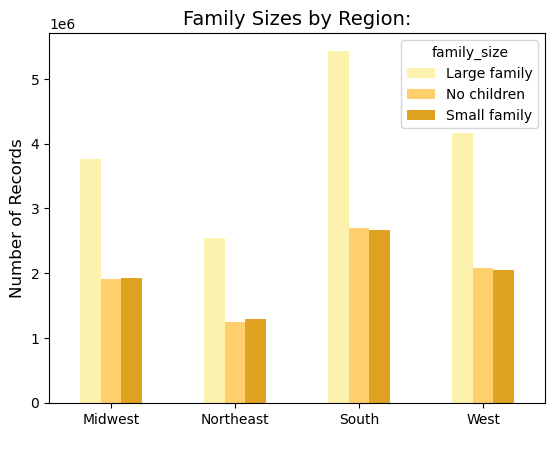

In [102]:
# Creating visualization for the crosstab
crossbar_family_region = crosstab_family_region.plot.bar(color=['#FDF2AD','#FFCF6D','#E0A221'])
plt.xlabel(" ", fontsize=12)
plt.xticks(rotation=0)
plt.ylabel("Number of Records", fontsize=12)  
plt.title("Family Sizes by Region:", fontsize=14)
plt.show()

# Comparing Family Size to Departments

In [103]:
# Now doing the same but for departments
crosstab_family_dept = pd.crosstab(ords_prod_merged['department'], ords_prod_merged['family_size'], dropna=False)

In [104]:
crosstab_family_dept

family_size,Large family,No children,Small family
department,,,
alcohol,76632,39143,37968
babies,214069,106494,103239
bakery,587266,295538,293983
beverages,1345476,674450,668233
breakfast,354949,176557,179141
bulk,17447,8278,8848
canned goods,536091,264838,267129
dairy eggs,2703405,1353388,1357223
deli,526537,265145,259567


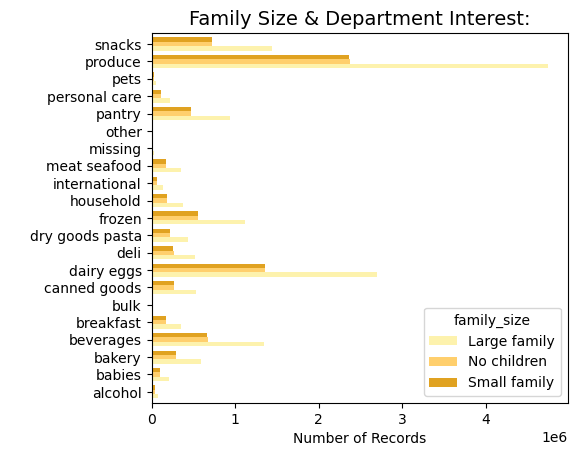

In [105]:
# Creating visualization for the crosstab
bar_width = .75
crossbar_family_dept = crosstab_family_dept.plot.barh(color=['#FDF2AD','#FFCF6D','#E0A221'], width=bar_width)
plt.xlabel("Number of Records", fontsize=10)
plt.xticks(rotation=0)
plt.ylabel(" ", fontsize=10)  
plt.title("Family Size & Department Interest:", fontsize=14)
plt.gcf().subplots_adjust(left=0.25)
plt.show()

# Comparing Spender Status to Region

In [106]:
# Keeping the naming convention format is helping with this
crosstab_spending_region = pd.crosstab(ords_prod_merged['region'], ords_prod_merged['spending_flag'], dropna=False)

In [107]:
crosstab_spending_region

spending_flag,High spender,Low spender
region,,
Midwest,156129,7447681
Northeast,93532,4977160
South,210182,10591428
West,160807,8139638


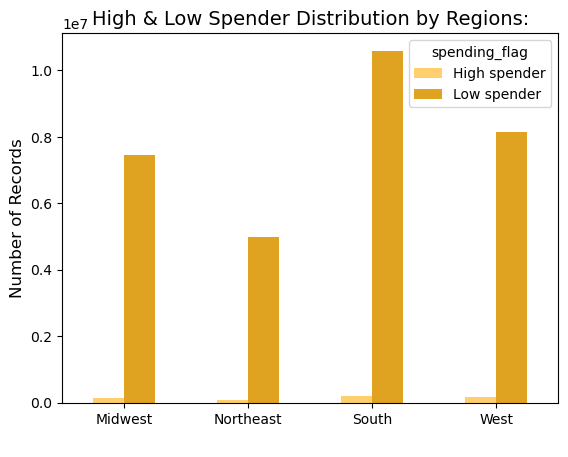

In [108]:
crossbar_spending_region = crosstab_spending_region.plot.bar(color=['#FFCF6D','#E0A221'])
plt.xlabel(" ", fontsize=12)
plt.xticks(rotation=0)
plt.ylabel("Number of Records", fontsize=12)  
plt.title("High & Low Spender Distribution by Regions:", fontsize=14)
plt.show()

# Comparing Spender Status to Department

In [109]:
# Now doing the same but for departments
crosstab_spending_dept = pd.crosstab(ords_prod_merged['department'], ords_prod_merged['spending_flag'], dropna=False)

In [110]:
crosstab_spending_dept

spending_flag,High spender,Low spender
department,,
alcohol,13249,140494
babies,4708,419094
bakery,29676,1147111
beverages,61361,2626798
breakfast,15802,694845
bulk,127,34446
canned goods,21429,1046629
dairy eggs,114647,5299369
deli,17661,1033588


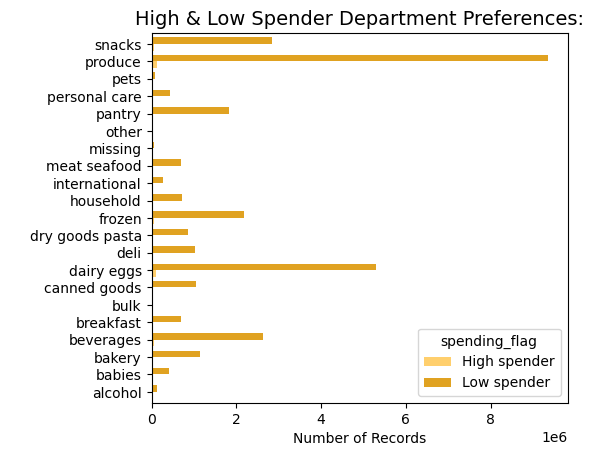

In [111]:
# Creating visualization for the crosstab
bar_width = .75
crossbar_spending_dept = crosstab_spending_dept.plot.barh(color=['#FFCF6D','#E0A221'], width=bar_width)
plt.xlabel("Number of Records", fontsize=10)
plt.xticks(rotation=0)
plt.ylabel(" ", fontsize=10)
plt.title("High & Low Spender Department Preferences:", fontsize=14)
plt.gcf().subplots_adjust(left=0.25)
plt.show()

# Comparing Loyalty Level to Regions

In [112]:
crosstab_loyalty_region = pd.crosstab(ords_prod_merged['region'], ords_prod_merged['loyalty_flag'], dropna=False)

In [113]:
crosstab_loyalty_region

loyalty_flag,Loyal customer,New customer,Regular customer
region,,,
Midwest,2375969,1473837,3754004
Northeast,1627699,981879,2461114
South,3408818,2076194,5316598
West,2665200,1598147,4037098


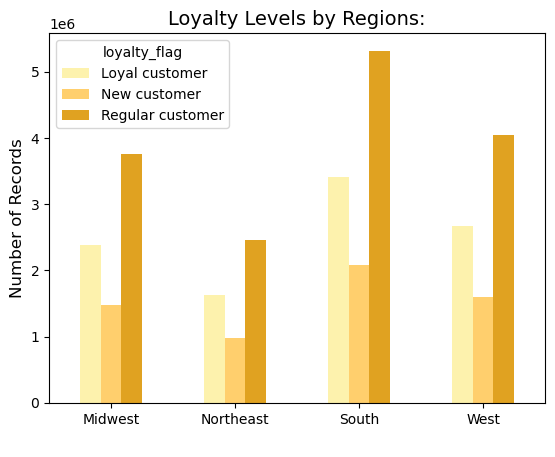

In [114]:
crossbar_loyalty_region = crosstab_loyalty_region.plot.bar(color=['#FDF2AD','#FFCF6D','#E0A221'])
plt.xlabel(" ", fontsize=12)
plt.xticks(rotation=0)
plt.ylabel("Number of Records", fontsize=12)  
plt.title("Loyalty Levels by Regions:", fontsize=14)
plt.show()

# Comparing Loyalty Levels to Departments

In [115]:
crosstab_loyalty_dept = pd.crosstab(ords_prod_merged['department'], ords_prod_merged['loyalty_flag'], dropna=False)

In [116]:
crosstab_loyalty_dept

loyalty_flag,Loyal customer,New customer,Regular customer
department,,,
alcohol,38726,37716,77301
babies,167108,60118,196576
bakery,381686,224397,570704
beverages,855024,512883,1320252
breakfast,223866,139909,346872
bulk,13834,5271,15468
canned goods,294594,236180,537284
dairy eggs,1835676,974289,2604051
deli,324046,205750,521453


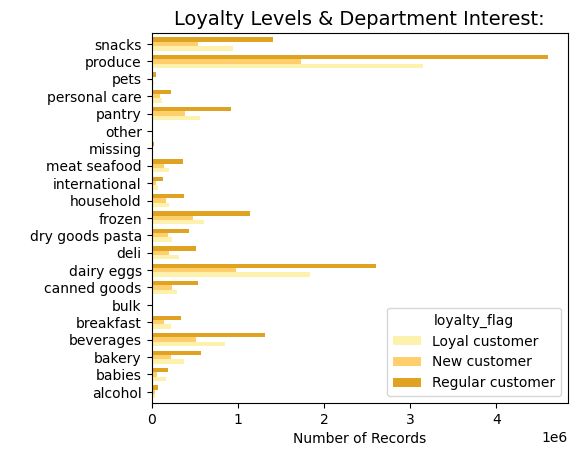

In [117]:
bar_width = .75
crossbar_loyalty_dept = crosstab_loyalty_dept.plot.barh(color=['#FDF2AD','#FFCF6D','#E0A221'], width=bar_width)
plt.xlabel("Number of Records", fontsize=10)
plt.xticks(rotation=0)
plt.ylabel(" ", fontsize=10)
plt.title("Loyalty Levels & Department Interest:", fontsize=14)
plt.gcf().subplots_adjust(left=0.25)
plt.show()

# Comparing Age Groups to Regions

In [118]:
crosstab_agegroup_region = pd.crosstab(ords_prod_merged['region'], ords_prod_merged['age_group'], dropna=False)

In [119]:
crosstab_agegroup_region

age_group,18-34ys,35-44yrs,45-54yrs,55-64yrs,65yrs and above
region,,,,,
Midwest,2004326,1212969,1212150,1182024,1992341
Northeast,1357289,756032,813208,769316,1374847
South,2900943,1716505,1660868,1684540,2838754
West,2193097,1282233,1328775,1300221,2196119


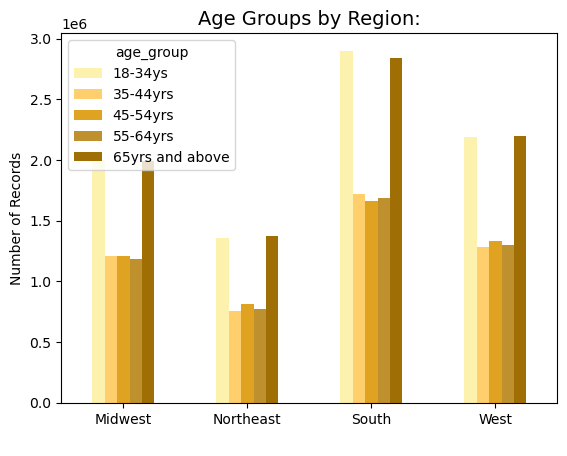

In [120]:
crossbar_agegroup_region = crosstab_agegroup_region.plot.bar(color=['#FDF2AD','#FFCF6D','#E0A221', '#BE912E', '#9F6F05'])
plt.xlabel(" ", fontsize=10)
plt.xticks(rotation=0)
plt.ylabel("Number of Records", fontsize=10)
plt.title("Age Groups by Region:", fontsize=14)
plt.show()

# Comparing Age Groups to Departments

In [121]:
crosstab_agegroup_dept = pd.crosstab(ords_prod_merged['department'], ords_prod_merged['age_group'], dropna=False)

In [122]:
crosstab_agegroup_dept

age_group,18-34ys,35-44yrs,45-54yrs,55-64yrs,65yrs and above
department,,,,,
alcohol,42625,22683,25331,24041,39063
babies,111092,69157,69655,64453,109445
bakery,313930,184133,185523,182725,310476
beverages,708110,414235,428706,422268,714840
breakfast,191084,110109,113001,110688,185765
bulk,9302,5391,5416,5222,9242
canned goods,285891,166695,168174,164860,282438
dairy eggs,1449362,847723,851555,835025,1430351
deli,279021,165396,164303,164911,277618


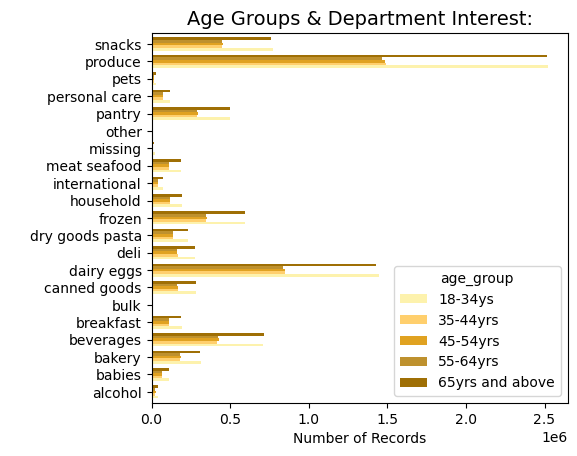

In [123]:
# Prior to running this, I want to note its probably a bad idea, since there are 5 bars for each department...
bar_width = .75
crossbar_agegroup_dept = crosstab_agegroup_dept.plot.barh(color=['#FDF2AD','#FFCF6D','#E0A221', '#BE912E', '#9F6F05'], width=bar_width)
plt.xlabel("Number of Records", fontsize=10)
plt.xticks(rotation=0)
plt.ylabel(" ", fontsize=10)  
plt.title("Age Groups & Department Interest:", fontsize=14)
plt.gcf().subplots_adjust(left=0.25)
plt.show()